In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# modeling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [2]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
x=df.drop(columns=['math_score'],axis=1)

In [4]:
y=df['math_score']

In [5]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer=StandardScaler()
oh_transformer=OneHotEncoder(handle_unknown='ignore')

preprocssor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",num_transformer,num_features)
    ]
)   



In [7]:
x=preprocssor.fit_transform(x)

In [8]:
x.shape

(1000, 19)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.shape

(800, 19)

create an evaluate function to give all metrics model training


In [12]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)
    return mae,mse,rmse,r2

In [14]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    # make predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    # evaluate the model
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('model performance for Training set')
    print("-Root mean squared error:{:.4f} ".format(model_train_rmse))
    print("-Mean absolute error:{:.4f} ".format(model_train_mae))
    print("-r2 score:{:.4f} ".format(model_train_r2))

    print('--------------------------------')

    print('model performance for Testing set')
    print("-Root mean squared error:{:.4f} ".format(model_test_rmse))   
    print("-Mean absolute error:{:.4f} ".format(model_test_mae))
    print("-r2 score:{:.4f} ".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('--------------------------------')
    print('\n')

LinearRegression
model performance for Training set
-Root mean squared error:5.3402 
-Mean absolute error:4.2723 
-r2 score:0.8735 
--------------------------------
model performance for Testing set
-Root mean squared error:5.4214 
-Mean absolute error:4.2253 
-r2 score:0.8792 
--------------------------------


Lasso
model performance for Training set
-Root mean squared error:6.5938 
-Mean absolute error:5.2063 
-r2 score:0.8071 
--------------------------------
model performance for Testing set
-Root mean squared error:6.5197 
-Mean absolute error:5.1579 
-r2 score:0.8253 
--------------------------------


Ridge
model performance for Training set
-Root mean squared error:5.3233 
-Mean absolute error:4.2650 
-r2 score:0.8743 
--------------------------------
model performance for Testing set
-Root mean squared error:5.3904 
-Mean absolute error:4.2111 
-r2 score:0.8806 
--------------------------------


KNeighborsRegressor
model performance for Training set
-Root mean squared error:

Result

In [15]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model','r2']).sort_values(by='r2',ascending=False)

,model,r2
2,Ridge,0.880593
0,LinearRegression,0.879216
8,CatBoostRegressor,0.851632
5,RandomForestRegressor,0.851096
7,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783497
4,DecisionTreeRegressor,0.737218
6,AdaBoostClassifier,0.213749


In [16]:
lin_mdel=LinearRegression()
lin_mdel=lin_mdel.fit(x_train,y_train)
y_pred=lin_mdel.predict(x_test)
score=r2_score(y_test,y_pred)
print("R2 score for Linear Regression model is: ",score)


R2 score for Linear Regression model is:  0.8792164757750934


Text(0, 0.5, 'y_pred')

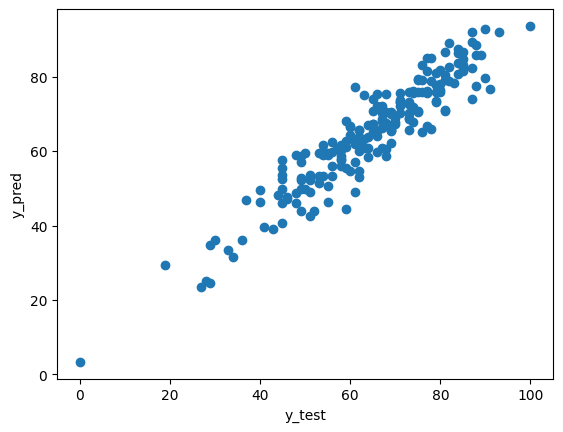

In [17]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

Text(0.5, 1.0, 'Linear Regression')

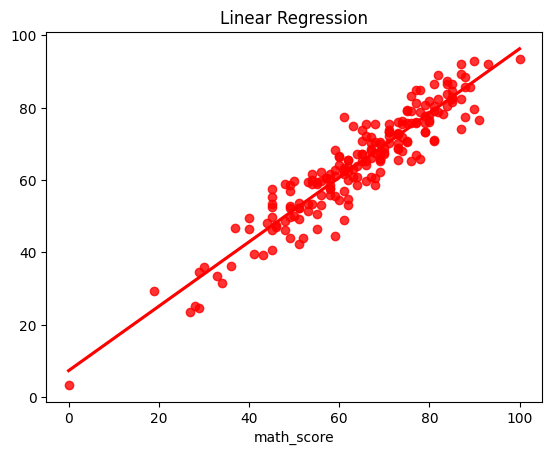

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')
plt.title('Linear Regression')

In [19]:
prd_df=pd.DataFrame({'y_test':y_test,'y_pred':y_pred,'difference':y_test-y_pred})
# prd_df['difference'].describe()

In [20]:
prd_df

,y_test,y_pred,difference
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500
